<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/Hands-on%20Machine%20Learning%20with%20Scikit-Learn%2C%20Keras%20%26%20TensorFlow/Chapter%2017/17_autoencoders_gans_and_diffusion_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6645 - val_loss: 0.3797
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.3229 - val_loss: 0.2726
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2719 - val_loss: 0.2673
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


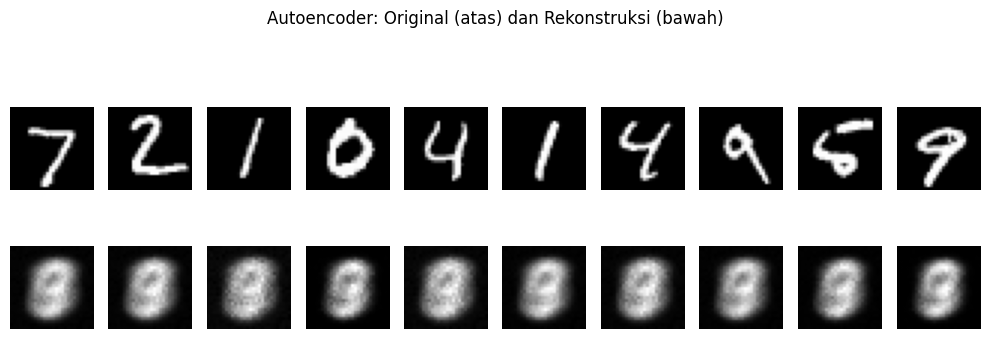

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load data MNIST
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalisasi nilai piksel ke rentang 0-1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Model encoder
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),  # Lapisan latent space
])

# Model decoder
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

# Gabungkan encoder dan decoder
stacked_autoencoder = keras.models.Sequential([stacked_encoder, stacked_decoder])

# Kompilasi model
stacked_autoencoder.compile(loss="binary_crossentropy", optimizer="sgd")

# Latih model
stacked_autoencoder.fit(x_train, x_train, epochs=3, validation_data=(x_test, x_test))

# Evaluasi hasil rekonstruksi
decoded_images = stacked_autoencoder.predict(x_test[:10])

# Visualisasi input dan output
plt.figure(figsize=(10, 4))
for i in range(10):
    # Input
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i], cmap="gray")
    plt.axis("off")

    # Rekonstruksi
    plt.subplot(2, 10, 10 + i + 1)
    plt.imshow(decoded_images[i], cmap="gray")
    plt.axis("off")

plt.suptitle("Autoencoder: Original (atas) dan Rekonstruksi (bawah)")
plt.tight_layout()
plt.show()


In [ ]:
# Contoh arsitektur Generator untuk GAN (DCGAN)
codings_size = 100
generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="same", activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="same", activation="tanh"),
])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


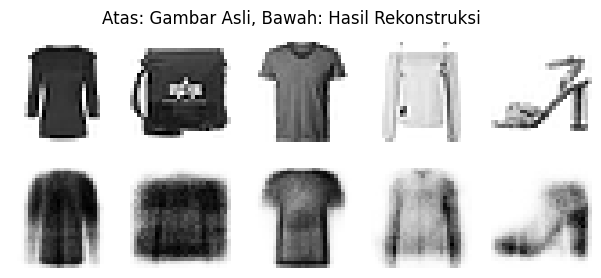

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Memuat dan mempersiapkan data Fashion MNIST
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

# Membangun dan melatih model Stacked Autoencoder
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_autoencoder = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_autoencoder.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.5))
history = stacked_autoencoder.fit(X_train, X_train, epochs=3, validation_data=(X_valid, X_valid), verbose=0)

# Fungsi untuk plotting
def plot_reconstructions(model, images, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")
        plt.axis("off")

# Menampilkan hasil
plot_reconstructions(stacked_autoencoder, X_valid)
plt.suptitle("Atas: Gambar Asli, Bawah: Hasil Rekonstruksi")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


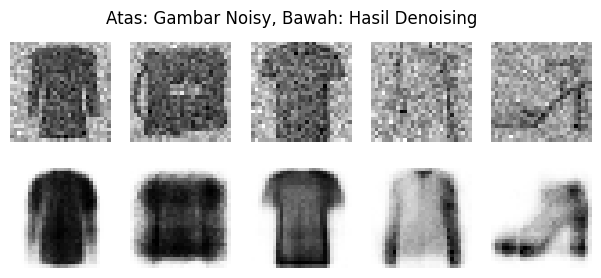

In [3]:
# Membangun Denoising Autoencoder
denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2), # Menambahkan noise saat training
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
denoising_autoencoder = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_autoencoder.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0))
history = denoising_autoencoder.fit(X_train, X_train, epochs=3, validation_data=(X_valid, X_valid), verbose=0)

# Membuat versi noisy dari data uji untuk ditampilkan
noise = keras.layers.GaussianNoise(0.2)
noisy_X_valid = noise(X_valid, training=True)

# Menampilkan hasil
plot_reconstructions(denoising_autoencoder, noisy_X_valid)
plt.suptitle("Atas: Gambar Noisy, Bawah: Hasil Denoising")
plt.show()

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 266.9205
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 176.7071
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 167.1869
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


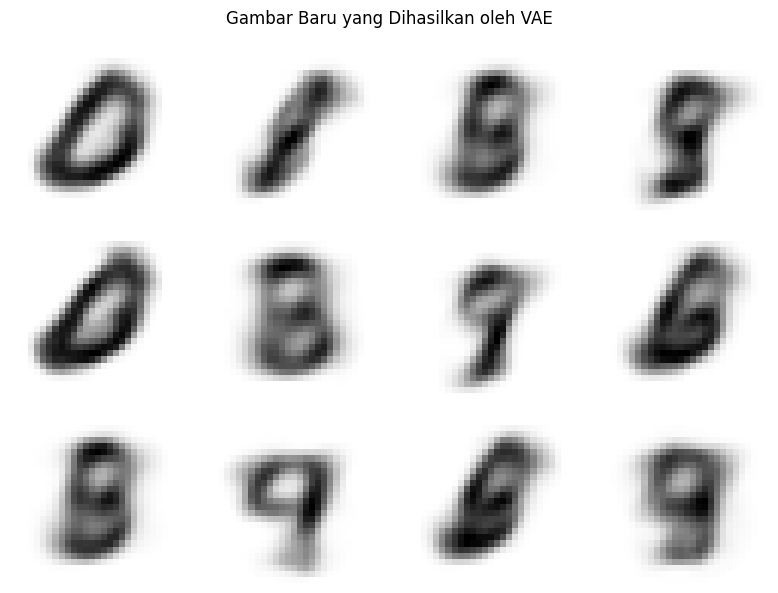

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Parameter latent space
latent_dim = 2

# Encoder
encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Flatten()(encoder_inputs)
x = layers.Dense(128, activation="relu")(x)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

# Sampling layer
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = Sampling()([z_mean, z_log_var])

# Encoder model
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# Decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(128, activation="relu")(latent_inputs)
x = layers.Dense(28 * 28, activation="sigmoid")(x)
decoder_outputs = layers.Reshape((28, 28, 1))(x)

# Decoder model
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

# VAE model (subclassing keras.Model)
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="loss")

    def compile(self, optimizer):
        super().compile()
        self.optimizer = optimizer

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            reconstruction_loss *= 28 * 28
            kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        return {"loss": self.total_loss_tracker.result()}

# Load dan siapkan data MNIST
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = x_test.astype("float32") / 255.0
x_test = np.expand_dims(x_test, -1)

# Instansiasi dan kompilasi VAE
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

# Training
vae.fit(x_train, epochs=3, batch_size=128)

# --- PLOT HASIL GENERASI DARI LATENT SPACE ---

# Sampling dari latent space
codings = tf.random.normal(shape=[12, latent_dim])
generated_images = vae.decoder.predict(codings)

# Plotting
fig, axes = plt.subplots(3, 4, figsize=(8, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(generated_images[i].squeeze(), cmap="binary")
    ax.axis("off")
plt.suptitle("Gambar Baru yang Dihasilkan oleh VAE")
plt.tight_layout()
plt.show()


Epoch 1/3 - d_loss: 0.2745 - g_loss: 3.5113
Epoch 2/3 - d_loss: 0.2604 - g_loss: 3.4369
Epoch 3/3 - d_loss: 0.3156 - g_loss: 2.9991


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


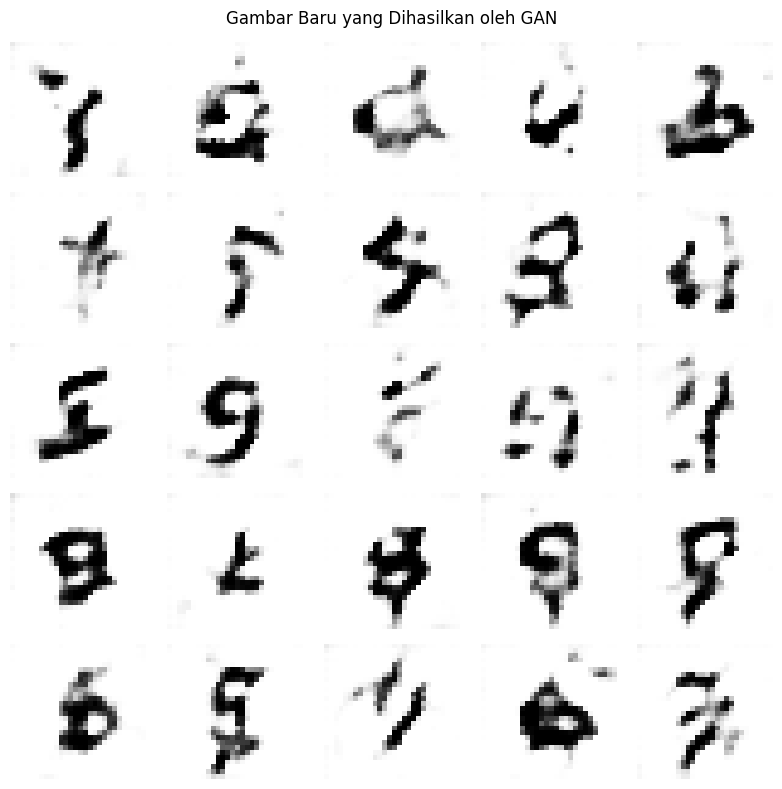

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Set seed
tf.random.set_seed(42)
np.random.seed(42)

# Hyperparameters
codings_size = 100
batch_size = 128
epochs = 3

# Load MNIST dan normalisasi ke [-1, 1]
(x_train, _), (_, _) = keras.datasets.mnist.load_data()
x_train = (x_train.astype("float32") - 127.5) / 127.5  # dari [0,255] ke [-1,1]
x_train = np.expand_dims(x_train, axis=-1)

# Dataset
dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(10000).batch(batch_size)

# === Generator ===
def build_generator():
    model = keras.Sequential([
        layers.Dense(7*7*128, input_shape=[codings_size]),
        layers.Reshape([7, 7, 128]),
        layers.BatchNormalization(),
        layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="same", activation="tanh")
    ])
    return model

# === Discriminator ===
def build_discriminator():
    model = keras.Sequential([
        layers.Conv2D(64, kernel_size=5, strides=2, padding="same", input_shape=[28, 28, 1]),
        layers.LeakyReLU(0.2),
        layers.Dropout(0.3),
        layers.Conv2D(128, kernel_size=5, strides=2, padding="same"),
        layers.LeakyReLU(0.2),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

# Instantiate
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss="binary_crossentropy", optimizer="adam")

# GAN model (generator + discriminator)
discriminator.trainable = False  # agar tidak dilatih saat melatih GAN
gan = keras.models.Sequential([generator, discriminator])
gan.compile(loss="binary_crossentropy", optimizer="adam")

# === Custom training loop ===
for epoch in range(epochs):
    for real_images in dataset:
        batch_len = real_images.shape[0]
        # Generate fake images
        noise = tf.random.normal(shape=[batch_len, codings_size])
        fake_images = generator(noise)

        # Combine real and fake images
        X = tf.concat([real_images, fake_images], axis=0)
        y = tf.constant([[1.0]] * batch_len + [[0.0]] * batch_len)

        # Train discriminator
        discriminator.trainable = True
        d_loss = discriminator.train_on_batch(X, y)

        # Train generator via GAN (labels set to 1 to fool the discriminator)
        noise = tf.random.normal(shape=[batch_len, codings_size])
        y_gen = tf.constant([[1.0]] * batch_len)
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gen)

    print(f"Epoch {epoch+1}/{epochs} - d_loss: {d_loss:.4f} - g_loss: {g_loss:.4f}")

# === Plotting ===
# Generate new images
noise = tf.random.normal(shape=[25, codings_size])
generated_images = generator.predict(noise)

# Plot
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8, 8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(generated_images[i, :, :, 0], cmap="binary")
    ax.axis("off")
plt.suptitle("Gambar Baru yang Dihasilkan oleh GAN")
plt.tight_layout()
plt.show()
